# SCC-ICMC-USP - 2º Semestre de 2023
## SCC0275 - Introdução à Ciência de Dados
### Professora: Roseli A. F. Romero
### Monitor: Roseval Malaquias Jr

### **Exercício 3**

**Número do Grupo:**

**Alunos:**
1. Gabriel de Avelar Las Casas Rebelo (11800462)

Nesta atividade, nosso objetivo é exercitar os seguintes conceitos:
- Manuseio e exploração de datasets utilizando a biblioteca `pandas`;
- Análise de variância e sua interpretação para a limpeza de datasets;
- Utilização de métodos de imputação de valores faltantes com a biblioteca `scikit-learn`;
- Transformação de variáveis utilizando a biblioteca `scikit-learn`;

---

Para os exercícios de **1** a **5**, utilizaremos o dataset **titanic.csv**. A célula de código a seguir realizará o download deste dataset para o ambiente virtual do Google Colab.


In [ ]:
# Download do dataset para o ambiente virtual.
!wget -O titanic.csv "https://drive.google.com/uc?export=download&id=1agkXL_AlnzqjrPKIPwJy01Bkh17GUW-3"

--2023-09-21 18:59:44--  https://drive.google.com/uc?export=download&id=1agkXL_AlnzqjrPKIPwJy01Bkh17GUW-3
Resolving drive.google.com (drive.google.com)... 173.194.174.102, 173.194.174.101, 173.194.174.138, ...
Connecting to drive.google.com (drive.google.com)|173.194.174.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/c3mu49pkji3pmrlpipvuc6mlekaefigs/1695322725000/17263126637575785733/*/1agkXL_AlnzqjrPKIPwJy01Bkh17GUW-3?e=download&uuid=cb7eaf67-f68b-4e0f-b6a3-0cf2e667cc25 [following]
--2023-09-21 18:59:45--  https://doc-0s-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/c3mu49pkji3pmrlpipvuc6mlekaefigs/1695322725000/17263126637575785733/*/1agkXL_AlnzqjrPKIPwJy01Bkh17GUW-3?e=download&uuid=cb7eaf67-f68b-4e0f-b6a3-0cf2e667cc25
Resolving doc-0s-a0-docs.googleusercontent.com (doc-0s-a0-docs.googleusercontent.com)... 64.233.188.132, 2

## Dataset **titanic.csv**

---
### Questão 01.

Carregue o dataset **titanic.csv** (`pandas.read_csv`) e interprete os valores ausentes corretamente. Utilize o parâmetro `na_values='?'`.

In [ ]:
import pandas as pd

df = pd.read_csv('titanic.csv', na_values='?')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


---
### Questão 02.
Realize uma análise exploratória inicial do dataset fornecido.

Para isso, você deve:

 - Apresente a quantidade de valores faltantes para cada variável do dataset.
 - Identifique o tipo de dado de cada uma das variáveis (se são numéricas ou categóricas). Pode-se induzir o tipo real das variáveis utilizando o nome delas e seus valores, ou acessar um [dicionário do dataset online](https://www.codingninjas.com/studio/library/intro-to-titanic-dataset-and-data-analysis).
 - Corrija os tipos das variáveis no dataframe pandas criado.

  **ATENÇÃO: O pandas pode importar as variáveis com os tipos incorretos!**

In [ ]:
print('Numero de elementos nulos')
print(df.isnull().sum())

print('------------------------------')
print('Tipos de elementos por coluna')
answer = """
PassengerId	        categórico
Survived            numérico
Pclass              categórico
Name                categórico
Sex                 categórico
Age                 numérico
SibSp               categórico
Parch               categórico
Ticket              categórico
Fare                numérico
Cabin               categórico
Embarked            categórico
"""
print(answer)

Numero de elementos nulos
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
------------------------------
Tipos de elementos por coluna

PassengerId	        categórico
Survived            numérico
Pclass              categórico
Name                categórico
Sex                 categórico
Age                 numérico
SibSp               categórico
Parch               categórico
Ticket              categórico
Fare                numérico
Cabin               categórico
Embarked            categórico





---

### Questão 03.

Realize o pré-processamento do dataset fornecido.

Para isso, você deve:


-   **Para as variáveis numéricas:** substitua os valores faltantes utilizando a estratégia de **mediana** (`sklearn.impute.SimpleImputer`). Depois, **normalize** as variáveis (`sklearn.preprocessing.MinMaxScaler`).
-   **Para as variáveis categóricas:** substitua os valores faltantes utilizando a estratégia de **mais frequentes** (`sklearn.impute.SimpleImputer`). Depois, converta os dados categóricos para uma representação numérica, utilizando a codificação **Label Encoding** (`sklearn.preprocessing.LabelEncoder`).

Por fim, apresente os resultados, comprovando que a imputação e transformações foram feitas corretamente.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np

#fazendo uma copia para nao modificar o original
dfbackup = df.copy()

#estabelecendo a forma de imputação
imputernum = SimpleImputer(missing_values= np.nan, strategy='mean')
imputercat = SimpleImputer(missing_values= np.nan, strategy='most_frequent')

#estabelecendo a forma de preprocessamento
scaler = MinMaxScaler()
lab = LabelEncoder()

#lista de valores a serem imputados devidamente categorizados
allvalues = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

numeric_variables = ['Survived', 'Age', 'Fare']
categoric_variables = ['PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']

# Iterando pelas colunas fazendo as modificações nos valores numéricos
for col in numeric_variables:
    df[col] = imputernum.fit_transform(df[[col]])  # Seleciona um DataFrame com uma unica coluna (2D)
    df[col] = scaler.fit_transform(df[[col]])

# Iterando pelas colunas fazendo as modificações nos valores categóricos
for col in categoric_variables:
    df[col] = imputercat.fit_transform(df[[col]])
    df[col] = lab.fit_transform(df[[col]])

print(df)

     PassengerId  Survived  Pclass  Name  Sex       Age  SibSp  Parch  Ticket  \
0              0       0.0       2   108    1  0.271174      1      0     523   
1              1       1.0       0   190    0  0.472229      1      0     596   
2              2       1.0       2   353    0  0.321438      0      0     669   
3              3       1.0       0   272    0  0.434531      1      0      49   
4              4       0.0       2    15    1  0.434531      0      0     472   
..           ...       ...     ...   ...  ...       ...    ...    ...     ...   
886          886       0.0       1   548    1  0.334004      0      0     101   
887          887       1.0       0   303    0  0.233476      0      0      14   
888          888       0.0       2   413    0  0.367921      1      2     675   
889          889       1.0       0    81    1  0.321438      0      0       8   
890          890       0.0       2   220    1  0.396833      0      0     466   

         Fare  Cabin  Embar

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,



---

### Questão 04.

Neste conjunto de dados, entre as variáveis tem alguma que tem outliers? Se sim, indique-os.

## Resposta: Os pontos marcados com o simbolo de um diamantes vermelho sao os outliers

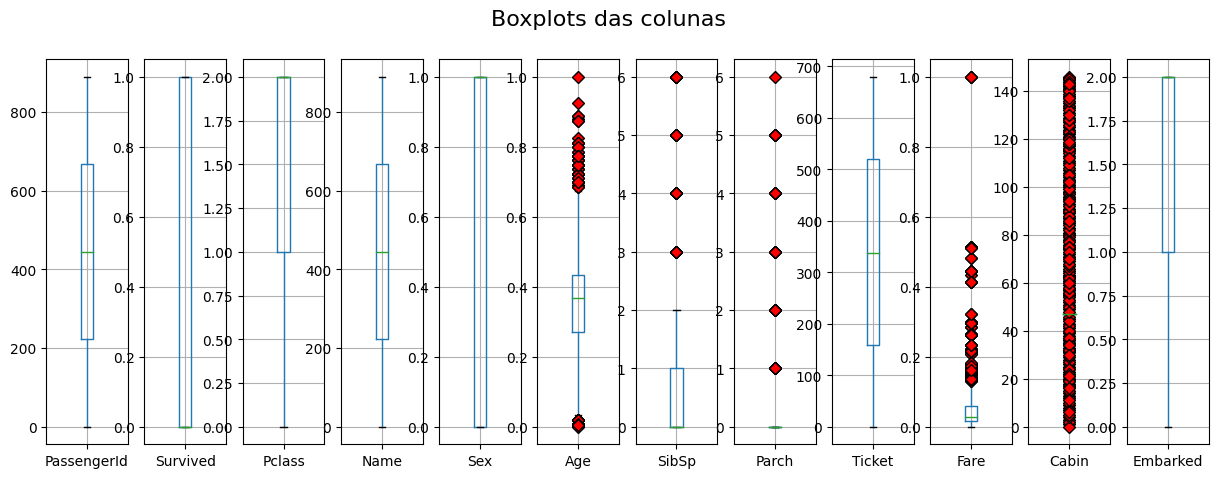

In [ ]:
import matplotlib.pyplot as plt

red_diamond = dict(markerfacecolor='r', marker='D')

# Cria um boxplot para cada coluna do dataframe
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(15, 5))  # Cria subplots para cada coluna

for i, column in enumerate(df.columns):
    df.boxplot(column=column, flierprops=red_diamond, ax=axes[i])

fig.suptitle('Boxplots das colunas', fontsize=16)

plt.show()




---

### Questão 05.

Determine as 3 variáveis categóricas com maior variância (`pandas.DataFrame.var`).

Por que seria difícil extrair conhecimento destas 3 variáveis?

> Lembre-se que após realizar a transformação das variáveis categóricas com codificação Label Encoding, essas variáveis tornaram-se do tipo numérico para o pandas. Contudo, **o conhecimento representado por elas ainda é categórico!**

## Resposta: Essas variaveis nao possuem nenhuma lógica propria para sua disposição por serem características individuais de cada comprador. Nome, numero do ticket ou ID podem ser numeros tao aleatorios quanto se queira justamente por servirem apenas para identificacao de cada passageiro, logo, sempre apresentarao grande variancia entre si

In [ ]:
print((df[categoric_variables].var()).nlargest(3)) #variaveis com maior variancia

PassengerId    66231.00000
Name           66231.00000
Ticket         40340.98654
dtype: float64




---

### Questão 06.

Com as 3 varíaveis identificadas na questão anterior, crie um novo dataset que não contenha essas 3 váriaveis.

Apresente as 5 primeiras linhas do novo dataset criado.

In [ ]:
new = df.copy() #criando um novo dataframe que permita a exclusao dessa colunas em seguranca

del new['PassengerId']
del new['Name']
del new['Ticket']

#passando os argumentos de head conforme especificacao
new.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,2,1,0.271174,1,0,0.014151,47,2
1,1.0,0,0,0.472229,1,0,0.139136,81,0
2,1.0,2,0,0.321438,0,0,0.015469,47,2
3,1.0,0,0,0.434531,1,0,0.103644,55,2
4,0.0,2,1,0.434531,0,0,0.015713,47,2
